In [73]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [74]:
#checking version of tenserflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [75]:
os.getcwd()

'/home/jovyan/work'

## GPU / CPU Check

In [76]:
tf.config.list_physical_devices("GPU")

[]

In [77]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [78]:
check_list = ['GPU','CPU']
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using keras and MNIST data

In [79]:
mnist = tf.keras.datasets.mnist

In [80]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [81]:
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [82]:
X_train_full.shape

(60000, 28, 28)

In [83]:
X_test.shape

(10000, 28, 28)

In [84]:
print(X_train_full.dtype, X_train_full.shape)

uint8 (60000, 28, 28)


In [85]:
X_train_full[0].shape

(28, 28)

In [86]:
X_test.shape

(10000, 28, 28)

In [87]:
x_valid,x_train = X_train_full[:5000]/255,X_train_full[5000:] / 255.
y_valid,y_train = y_train_full[:5000] ,y_train_full[5000:]

X_test = X_test / 255.

In [88]:
len(X_train_full[5000:])

55000

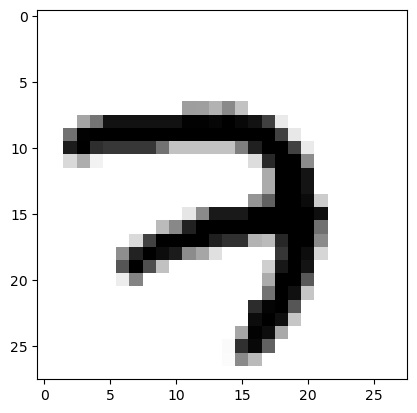

In [89]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

<AxesSubplot: >

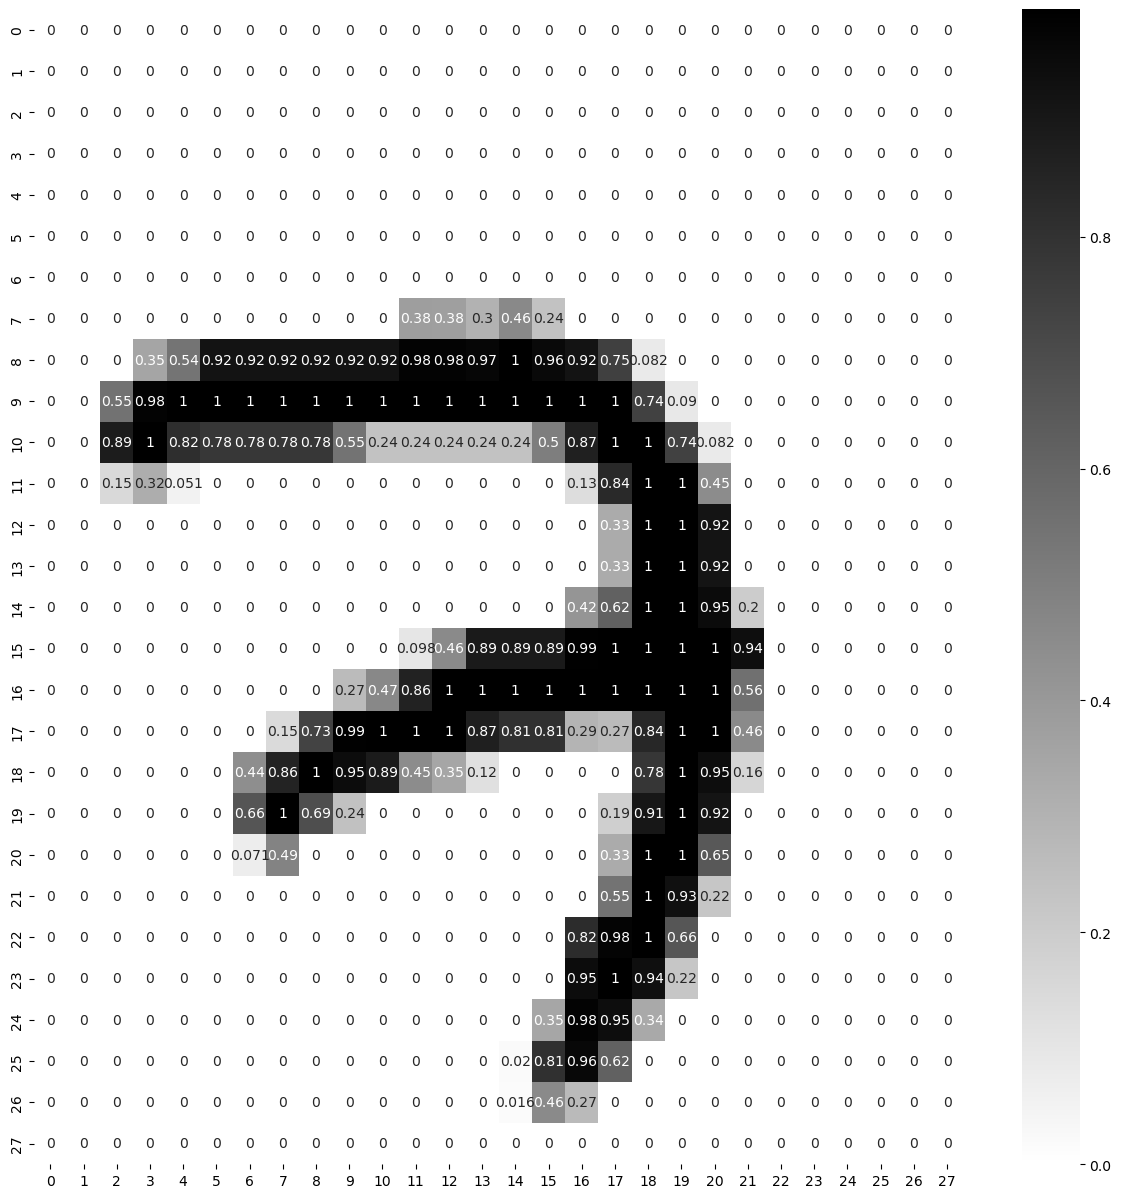

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap='binary')

## Trainable Parameters

In [91]:
# Architecture Used

In [92]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
         tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
         tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

model_clf = tf.keras.models.Sequential(LAYERS)

In [93]:
model_clf.layers

In [94]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [95]:
sum((235500,30100,1010))

266610

In [96]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [97]:
hidden1.get_weights()[0].shape

(784, 300)

In [98]:
hidden1.get_weights()[1].shape

(300,)

In [99]:
hidden1.get_weights()

[array([[-0.02326211, -0.06441314, -0.00189763, ..., -0.05022918,
          0.00200514,  0.02485105],
        [-0.03084022,  0.07377319, -0.05459139, ..., -0.05762655,
         -0.0137631 ,  0.06625292],
        [ 0.02617052, -0.03633223,  0.07030682, ..., -0.04544759,
         -0.02018612,  0.02609432],
        ...,
        [-0.00850195, -0.01608453,  0.0632887 , ...,  0.05264865,
          0.07312442,  0.03281248],
        [ 0.06776285, -0.0739337 ,  0.05362424, ...,  0.03950711,
          0.00828191, -0.04476539],
        [ 0.02540325, -0.0278952 ,  0.06704901, ..., -0.01259721,
         -0.04626183, -0.04256947]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [100]:
weights,biases = hidden1.get_weights()

In [101]:
weights.shape

(784, 300)

In [104]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [108]:
#training
EPOCHS = 30
VALIDATION_SET = (x_valid,y_valid)

history = model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data = VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6061 - accuracy: 0.8464 - val_loss: 0.3056 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.9193 - val_loss: 0.2428 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9349 - val_loss: 0.1957 - val_accuracy: 0.9458
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1955 - accuracy: 0.9441 - val_loss: 0.1718 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1708 - accuracy: 0.9512 - val_loss: 0.1576 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1514 - accuracy: 0.9567 - val_loss: 0.1402 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9613 - val_loss: 0.1306 - val_accuracy:

In [109]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [110]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606115,0.846364,0.305634,0.9130
1,0.282204,0.919255,0.242806,0.9302
2,0.229382,0.934909,0.195654,0.9458
3,0.195465,0.944109,0.171793,0.9524
4,0.170764,0.951182,0.157628,0.9570
5,0.151423,0.956709,0.140158,0.9610
6,0.135681,0.961345,0.130617,0.9644
7,0.123290,0.965309,0.121746,0.9636
8,0.112567,0.968309,0.114871,0.9670
9,0.103028,0.971309,0.105046,0.9708


<AxesSubplot: >

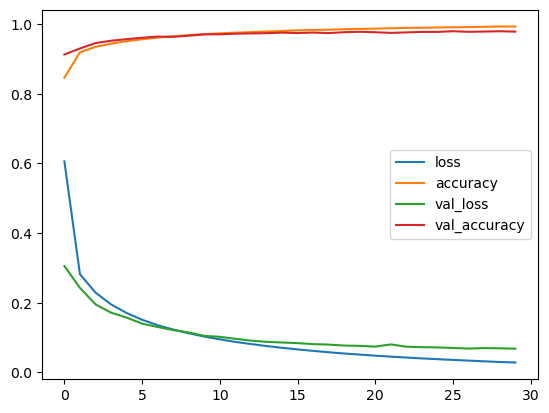

In [112]:
pd.DataFrame(history.history).plot()

In [114]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9781


[0.06950486451387405, 0.9781000018119812]

In [115]:
x_new = X_test[:3]

In [117]:
actual = y_test[:3]

In [118]:
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot: >

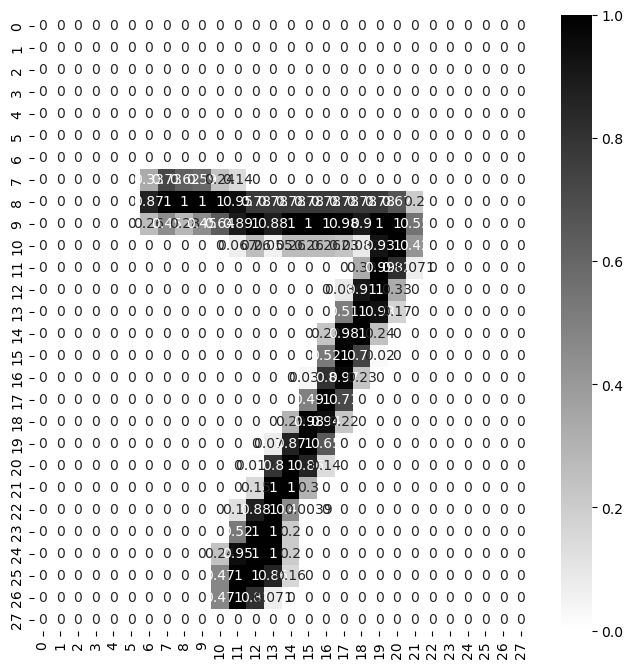

In [121]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [122]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 105ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [123]:
y_prob

array([[1.48665606e-06, 1.83357241e-08, 1.31621404e-04, 1.66281621e-04,
        2.17954321e-09, 3.07143637e-07, 7.50472861e-12, 9.99689460e-01,
        1.49454706e-06, 9.35557637e-06],
       [3.30340328e-07, 9.68709628e-06, 9.99925613e-01, 4.78617876e-05,
        5.07707348e-11, 2.50609133e-07, 4.86147144e-07, 9.53158559e-13,
        1.57331306e-05, 3.07913504e-12],
       [9.50393860e-06, 9.96267021e-01, 2.36638094e-04, 6.63227183e-05,
        5.06355660e-04, 1.54603185e-05, 1.18719785e-04, 1.46118528e-03,
        1.24915247e-03, 6.96482093e-05]], dtype=float32)

In [125]:
y_pred = np.argmax(y_prob,axis=-1)

In [126]:
y_pred

array([7, 2, 1])

In [127]:
actual

array([7, 2, 1], dtype=uint8)

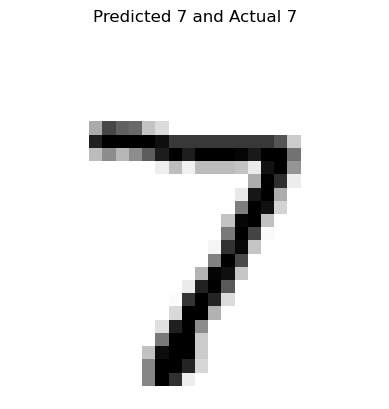

*******************************************************


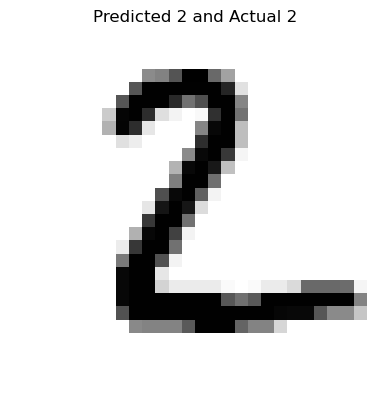

*******************************************************


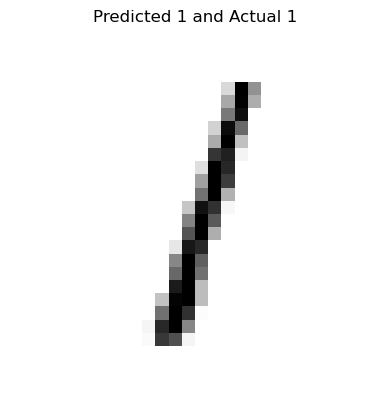

*******************************************************


In [133]:
#plot
for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("*******************************************************")